In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
import folium
import requests
from pandas.io.json import json_normalize
import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_rows = 30
pd.options.display.max_columns = 30

In [2]:
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_in_Hungary')


In [3]:
pd.options.display.max_rows = 200
pd.options.display.max_columns = 10
data = pd.read_csv("Budapest_Neighbourhoods.csv")
data.Longitude.describe()

count    23.000000
mean     19.092479
std       0.071046
min      18.982636
25%      19.043664
50%      19.079662
75%      19.125458
max      19.269406
Name: Longitude, dtype: float64

In [4]:
data.Longitude=data.Longitude.astype('float64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Postal Code     23 non-null     int64  
 1   District names  23 non-null     object 
 2   Neighborhood    23 non-null     object 
 3   Borough         23 non-null     object 
 4   Latitude        23 non-null     float64
 5   Longitude       23 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.2+ KB


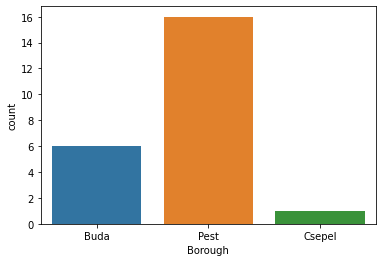

In [5]:
sns.countplot(data.Borough)

In [6]:
data.rename(columns={'Postal Code':'Postal_Code','District Num':'District_Num' }, inplace=True)
data

,Postal_Code,District names,Neighborhood,Borough,Latitude,Longitude
0,1010,Várkerület,I.,Buda,47.499163,19.035143
1,1020,2nd district,II.,Buda,47.538887,18.982636
2,1030,Óbuda-Békásmegyer,III.,Buda,47.567611,19.036780
3,1040,Újpest,IV.,Pest,47.558687,19.079662
4,1050,Belváros-Lipótváros,V.,Pest,47.499945,19.050549
5,1060,Terézváros,VI.,Pest,47.508516,19.065122
6,1070,Erzsébetváros,VII.,Pest,47.502132,19.072910
7,1080,Józsefváros,VIII.,Pest,47.490595,19.087340
8,1090,Ferencváros,IX.,Pest,47.465356,19.090356
9,1100,K?bánya,X.,Pest,47.482235,19.156494


Finding the Co-ordinates of the Busapest city to create a map

In [7]:
from geopy.geocoders import Nominatim
address = 'Budapest, Hungary'

geolocator = Nominatim(user_agent="Budapest_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Budapest City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Budapest City are 47.4983815, 19.0404707.


In [8]:
address = 'Óbuda-Békásmegyer  , Budapest, Hungary'
print('The geograpical coordinate of Budapest City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Budapest City are 47.4983815, 19.0404707.


Lets create a Budapest map

In [9]:
map_Budapest  = folium.Map(location=[latitude, longitude], zoom_start=11)
map_Budapest

In [10]:
address = 'Budapest, Hungary'
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Budapest City are {} N, {} E.'.format(latitude, longitude))

The geograpical coordinate of Budapest City are 47.4983815 N, 19.0404707 E.


In [11]:
for lat,lng, borough, neighborhood in zip(data['Latitude'], data['Longitude'], data['Borough'], data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Budapest)  
    
map_Budapest

In [12]:
CLIENT_ID = 'O2POWVEYQYEX53AJMXZZUSGOCLWFJEOMGX0TQ0V1PKJTGKKL' # your Foursquare ID
CLIENT_SECRET = 'L1KYV3VDRQ3PQBQNT32KPBJ3KGOLCQPWHYISIXLDGB01OMYL' # your Foursquare Secret
VERSION = '20200802'
# LIMIT = 30
ACCESS_TOKEN = 'IPUWJMEI0V5WNSIDRJCFHXV0TAOGBDHPVS2HFZFW4EFQOXQY'
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
print('ACCESS_TOKEN:' + ACCESS_TOKEN)

Your credentails:
CLIENT_ID: O2POWVEYQYEX53AJMXZZUSGOCLWFJEOMGX0TQ0V1PKJTGKKL
CLIENT_SECRET:L1KYV3VDRQ3PQBQNT32KPBJ3KGOLCQPWHYISIXLDGB01OMYL
ACCESS_TOKEN:IPUWJMEI0V5WNSIDRJCFHXV0TAOGBDHPVS2HFZFW4EFQOXQY


Now, let's get the data for the top 10 categories present in this city.

In [13]:
categories_url = 'https://api.foursquare.com/v2/venues/categories?client_id={}&client_secret={}&v={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
            
# make the GET request
results = requests.get(categories_url).json()
results

{'meta': {'code': 200, 'requestId': '5f3015531cb0e54c1eeca60c'},
 'response': {'categories': [{'id': '4d4b7104d754a06370d81259',
    'name': 'Arts & Entertainment',
    'pluralName': 'Arts & Entertainment',
    'shortName': 'Arts & Entertainment',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_',
     'suffix': '.png'},
    'categories': [{'id': '56aa371be4b08b9a8d5734db',
      'name': 'Amphitheater',
      'pluralName': 'Amphitheaters',
      'shortName': 'Amphitheater',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_',
       'suffix': '.png'},
      'categories': []},
     {'id': '4fceea171983d5d06c3e9823',
      'name': 'Aquarium',
      'pluralName': 'Aquariums',
      'shortName': 'Aquarium',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/aquarium_',
       'suffix': '.png'},
      'categories': []},
     {'id': '4bf58dd8d48988d1e1931735',
      'name': 'A

List of top categories of venues available in the city

In [14]:
categories_list = []
for category in results['response']['categories']:      
#         print(category['name'] + ' (' + category['id'] + ')')
        categories_list.append((category['name'], category['id']))
categories_list

[('Arts & Entertainment', '4d4b7104d754a06370d81259'),
 ('College & University', '4d4b7105d754a06372d81259'),
 ('Event', '4d4b7105d754a06373d81259'),
 ('Food', '4d4b7105d754a06374d81259'),
 ('Nightlife Spot', '4d4b7105d754a06376d81259'),
 ('Outdoors & Recreation', '4d4b7105d754a06377d81259'),
 ('Professional & Other Places', '4d4b7105d754a06375d81259'),
 ('Residence', '4e67e38e036454776db1fb3a'),
 ('Shop & Service', '4d4b7105d754a06378d81259'),
 ('Travel & Transport', '4d4b7105d754a06379d81259')]

Defining the function 

In [15]:
def get_venues_count(lat,long, radius, categoryId):
    explore_url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION,
                lat,
                long,
                radius,
                categoryId)

    # make the GET request
    return requests.get(explore_url).json()['response']['totalResults']

In [16]:
#Create new dataframe to store venues data
df_venues = data.loc[:,['Neighborhood','Latitude','Longitude']].copy()
for c in categories_list:
    df_venues[c[0]] = 0 #Creating new columns to df_venues with just the Categories name
    
df_venues.head()

,Neighborhood,Latitude,Longitude,Arts & Entertainment,College & University,...,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,I.,47.499163,19.035143,0,0,...,0,0,0,0,0
1,II.,47.538887,18.982636,0,0,...,0,0,0,0,0
2,III.,47.567611,19.036780,0,0,...,0,0,0,0,0
3,IV.,47.558687,19.079662,0,0,...,0,0,0,0,0
4,V.,47.499945,19.050549,0,0,...,0,0,0,0,0


Getting the frequencies of each categories in all neifgborhoods

In [17]:
#Request number of venues, store result as CSV
for i, row in df_venues.iterrows():
    for c in categories_list:        
        df_venues.loc[i, c[0]] = get_venues_count(df_venues.Latitude.iloc[i], df_venues.Longitude.iloc[i], radius=2000, categoryId=c[1])
    print(i)
    df_venues.to_csv('area_venues.csv')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


In [19]:
df_venues=pd.read_csv('area_venues.csv', index_col=0)
df_venues.head()

,Neighborhood,Latitude,Longitude,Arts & Entertainment,College & University,...,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,I.,47.499163,19.035143,120,57,...,179,174,29,180,176
1,II.,47.538887,18.982636,6,2,...,39,36,1,33,30
2,III.,47.567611,19.036780,6,10,...,52,67,11,60,44
3,IV.,47.558687,19.079662,11,27,...,69,89,12,91,80
4,V.,47.499945,19.050549,142,94,...,195,181,42,196,188


Scaling the data using MinMax scaler to Normalize the data

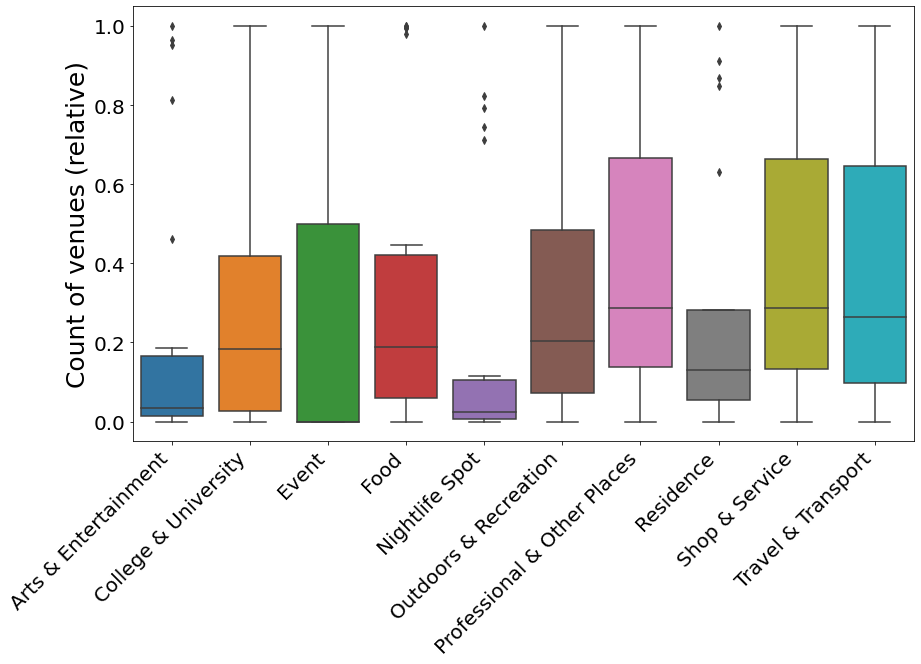

In [20]:
df_scaled = df_venues[['Arts & Entertainment','College & University','Event','Food','Nightlife Spot','Outdoors & Recreation','Professional & Other Places','Residence', 'Shop & Service', 'Travel & Transport']]

from sklearn.preprocessing import MinMaxScaler
ME=MinMaxScaler()

df_scaled = ME.fit_transform(df_scaled)
df_scaled = pd.DataFrame(df_scaled, columns=['Arts & Entertainment','College & University','Event','Food','Nightlife Spot','Outdoors & Recreation','Professional & Other Places','Residence', 'Shop & Service', 'Travel & Transport'])
df_scaled

plt.figure(figsize=(14,8))
ax = sns.boxplot(data = df_scaled)
ax.set_ylabel('Count of venues (relative)', fontsize=25)
ax.tick_params(labelsize=20)
plt.xticks(rotation=45, ha='right')

plt.show()



In [25]:
df_scaled.head()

,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,0.813793,0.602151,0.75,0.995833,0.744856,0.912088,0.957055,0.630435,0.879581,0.905882
1,0.027586,0.010753,0.00,0.054167,0.000000,0.142857,0.110429,0.021739,0.109948,0.047059
2,0.027586,0.096774,0.00,0.170833,0.024691,0.214286,0.300613,0.239130,0.251309,0.129412
3,0.062069,0.279570,0.00,0.395833,0.094650,0.307692,0.435583,0.260870,0.413613,0.341176
4,0.965517,1.000000,1.00,1.000000,1.000000,1.000000,1.000000,0.913043,0.963351,0.976471


Descriptive statistics:

In [21]:
df_scaled.describe()

,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,0.218291,0.289388,0.260870,0.340399,0.201467,0.321070,0.399573,0.283554,0.399954,0.385934
std,0.350478,0.321044,0.380477,0.373829,0.335666,0.325662,0.337065,0.324534,0.332266,0.346718
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.013793,0.026882,0.000000,0.060417,0.006173,0.071429,0.138037,0.054348,0.133508,0.097059
50%,0.034483,0.182796,0.000000,0.187500,0.024691,0.203297,0.288344,0.130435,0.287958,0.264706
75%,0.165517,0.419355,0.500000,0.420833,0.104938,0.483516,0.665644,0.282609,0.664921,0.647059
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Modelling

In [22]:
# set number of clusters
kc = 4

from sklearn.cluster import KMeans

# run k-means clustering
kmeans = KMeans(n_clusters=kc, random_state=0).fit(df_scaled)

kmeans_labels = kmeans.labels_

df_venues_clustered = df_venues.copy()
df_venues_clustered['Cluster'] = kmeans_labels

#dataframe to be used for box plot
df_scaled_clustered = df_scaled.copy()
df_scaled_clustered['Cluster'] = kmeans_labels
df_scaled_clustered

,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,...,Professional & Other Places,Residence,Shop & Service,Travel & Transport,Cluster
0,0.813793,0.602151,0.75,0.995833,0.744856,...,0.957055,0.630435,0.879581,0.905882,3
1,0.027586,0.010753,0.00,0.054167,0.000000,...,0.110429,0.021739,0.109948,0.047059,0
2,0.027586,0.096774,0.00,0.170833,0.024691,...,0.300613,0.239130,0.251309,0.129412,0
3,0.062069,0.279570,0.00,0.395833,0.094650,...,0.435583,0.260870,0.413613,0.341176,2
4,0.965517,1.000000,1.00,1.000000,1.000000,...,1.000000,0.913043,0.963351,0.976471,1
5,1.000000,0.763441,1.00,0.995833,0.794239,...,0.944785,0.847826,1.000000,0.947059,1
6,0.951724,0.946237,1.00,1.000000,0.823045,...,0.987730,1.000000,0.989529,1.000000,1
7,0.462069,0.784946,0.75,0.979167,0.711934,...,0.766871,0.869565,0.790576,0.864706,3
8,0.186207,0.451613,0.00,0.354167,0.086420,...,0.411043,0.239130,0.319372,0.405882,2
9,0.013793,0.021505,0.00,0.066667,0.004115,...,0.288344,0.065217,0.151832,0.211765,0


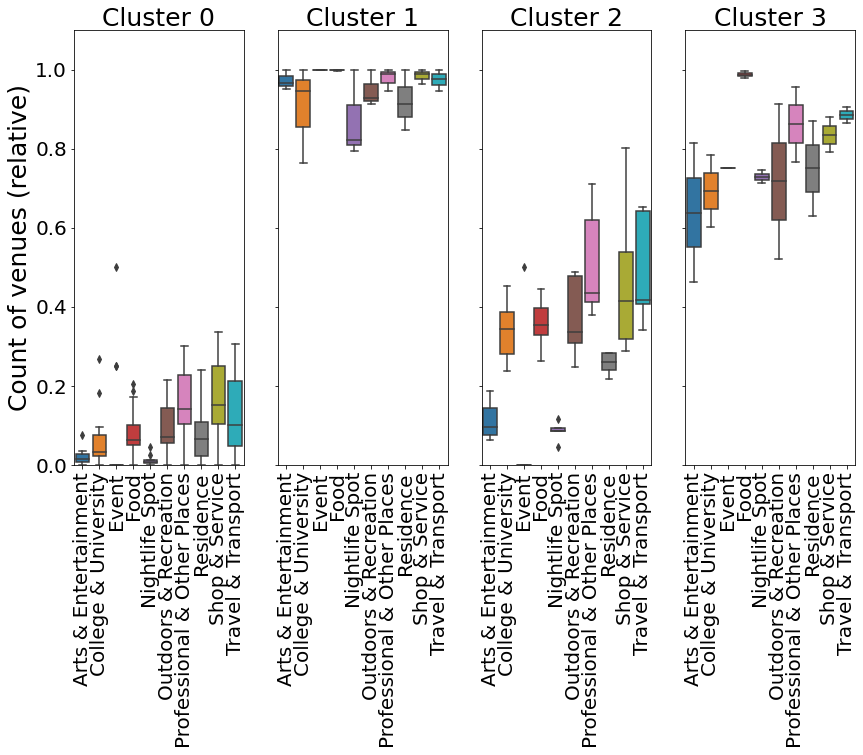

In [23]:
fig,axes= plt.subplots(1,kc,figsize=(14,8),sharey=True)

axes[0].set_ylabel('Count of venues (relative)', fontsize=25)
#plt.set_xlabel('Venue category', fontsize='x-large')

for k in range(0, kc):
    #Set same y axis limits
    axes[k].set_ylim(0,1.1)
    axes[k].xaxis.set_label_position('top')
    axes[k].set_xlabel('Cluster ' + str(k), fontsize=25)
    axes[k].tick_params(labelsize=20)
    plt.sca(axes[k])
    plt.xticks(rotation='vertical')
    sns.boxplot(data = df_scaled_clustered[df_scaled_clustered['Cluster'] == k].drop('Cluster',1), ax=axes[k])

plt.show()

In [24]:
map_Budapest  = folium.Map(location=[latitude, longitude], zoom_start=11)


#add markers
for i, area, lat, long, cluster in zip(df_venues_clustered.index,
                                         df_venues_clustered['Neighborhood'],
                                         df_venues_clustered['Latitude'],
                                         df_venues_clustered['Longitude'],
                                         df_venues_clustered['Cluster']):   
    #colors = sns.color_palette(None, kclusters).as_hex()
    colors=['blue','green','red','magenta']
    folium.CircleMarker(
        [lat,long],
        fill=True,
        fill_opacity=1,
        popup=folium.Popup(area, parse_html=True),
        radius=4,
        color=colors[cluster]
    ).add_to(map_Budapest)
    
    
      
map_Budapest

Listing out all districts under each clusters:

In [ ]:
print('Cluster 3 - Pink')
print(df_venues_clustered[['Neighborhood','Cluster']][df_venues_clustered.Cluster == 3])
print('---------------------------------------------------------------')
print('Cluster 0 - Blue')
print(df_venues_clustered[['Neighborhood','Cluster']][df_venues_clustered.Cluster == 0])
print('---------------------------------------------------------------')
print('Cluster 2 - Red')
print(df_venues_clustered[['Neighborhood','Cluster']][df_venues_clustered.Cluster == 2])
print('---------------------------------------------------------------')
print('Cluster 1 - Green')
print(df_venues_clustered[['Neighborhood','Cluster']][df_venues_clustered.Cluster == 1])



#### Results

Here is how we can understand these clusters:   

*Cluster 0 (Blue)* - is the Highly developed districts of the city.  
*Cluster 1 (Green)* - has low frequencies for all venue categories. They appear to be underdeveloped neighborhoods of the city.  
*Cluster 2 (Red)* - has average scores with more professional places and Transport services being the most popular hence falling under the developing neighborhoods bucket. These are mostly residential suburbs.  
*Cluster 3 (Pink)* - has consistently high frequencies for all venue categories. This is the most diversely developed part of city.



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(20,20))
# Make a data frame
df_scaled_clustered
 
# Initialize the figure
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set1')
 
# multiple bar plot
num=0
for column in df_scaled_clustered.drop('Cluster', axis=1):
    num+=1
 
    # Find the right spot on the plot
    plt.subplot(5,2, num)
 
    # Plot the barplot
    sns.barplot(y = df_scaled_clustered[column], x='Cluster', data=df_scaled_clustered)
 
    # Same limits for everybody!
    plt.xlim(-0.6,4)
    plt.ylim(0,1.2)
 
    # Add title
    plt.title(column, loc='left', fontsize=16, fontweight=0 )
 
# general title
plt.suptitle("Clusterwise segementation on each categories", fontsize=20, fontweight=0, color='black', style='oblique', y=1.02)
plt.savefig(fname='Chart.JPEG',dpi=200, format='JPEG')


### Conclusion:

Our aim was to aid anyone who visits Budapest city for either Employement, Business or Toursism to decide the place of stay based on what each neighborhood has to offer and their personal preferences and our analysis was able to successfully serve the purpose.

### Additional Key Findings:

As per our analysis we can see that few neighborhoods of Budapest city can be classified as Fully developed, Highly developed, Developping and Under developed Neighborhoods based on the data from Foursquare API.But with Budapest city as one of the fast growing tech hubs of Eastern Europe, we can expect the urban footprint of the Budapest city will expand as new growth areas keeps establishing every year.

Districts IV, IX, XI, XIII & XIV emerge as the major growing areas and might even see a transformation from Developing neighborhood to downtown/ uptown as its land usage and the number of tech companies in these districts is increasing in last few years.


### Future scope:

It would be interesting to further study how we need to consider rental prices and the population data to Predict a growth pattern in these neighbourhoods which will also lead us to identify early business and service opportunities in currently under developed areas. 

### References:  

1) https://en.wikipedia.org/wiki/List_of_postal_codes_in_Hungary    
2) https://en.wikipedia.org/wiki/List_of_districts_in_Budapest  